In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

sys.path.append('../')
from src.grid import *
from src import grid_preconditioner
from eigenwell.src.constants import *

In [2]:
N = [100,100]
dL = np.array([0.01, 0.01])*1e-6
# plt.figure(figsize = (10,10))
# plt.spy(fd.Dyb, markersize = 2)
L= N*dL;
print(L)
xrange = [-L[0]/2, L[0]/2]
yrange = [-L[1]/2, L[1]/2]

[1.e-06 1.e-06]


## PML test
Best way to test pml is FDFD driven

(10000, 10000) (10000,)


/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


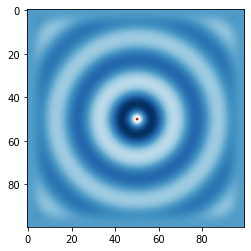

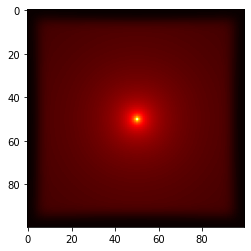

In [3]:
from scipy.sparse.linalg import spsolve as bslash
eps_r = np.ones(N)
wvlen = 0.2e-6;
Mz = np.zeros(N)

Npml = [15,15]
Mz[N[0]//2,N[1]//2] = 1;

b = (Mz.flatten());

omega = 2*np.pi*C0/wvlen;

pml = grid_preconditioner.PML(N,Npml, omega);
pml.Soperators(xrange, yrange);

fd = FiniteDifference(dL,N)
fd.make_derivatives(PML=pml)

Tep = sp.spdiags(eps_r.flatten(), 0, np.prod(N), np.prod(N))

A = fd.Dxf@fd.Dxb + fd.Dyf@fd.Dyb + omega**2*MU0*EPSILON0*Tep;
print(A.shape, b.shape)
## spsolve
from scipy.sparse.linalg import splu
solver = splu(A);

x = solver.solve(b)
field = np.reshape(x, N)

plt.imshow(np.real(field), cmap = 'RdBu')
plt.show();

plt.imshow(np.abs(field), cmap = 'hot')
plt.show();

(10000, 10000)


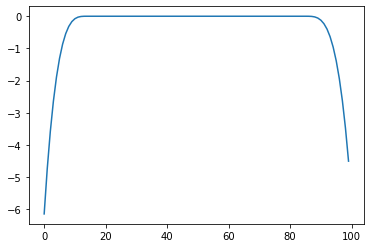

In [4]:
print(pml.Sxf.shape)
plt.plot(np.imag(pml.sxb))

## Symmetrization of PML